In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats as st

In [2]:
df_usa = pd.read_csv("Data_MidTerm_Project_Real_State_Regression.csv")

In [4]:
print(df_usa.shape)
print(df_usa.nunique())

(21597, 21)
id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64


In [5]:
print(df_usa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [6]:
df_usa.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,13/10/2014,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,09/12/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,25/02/2015,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,09/12/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,18/02/2015,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


Assuming our target variable for our model will be price, let's get to know this feature.

/Users/mm527x/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


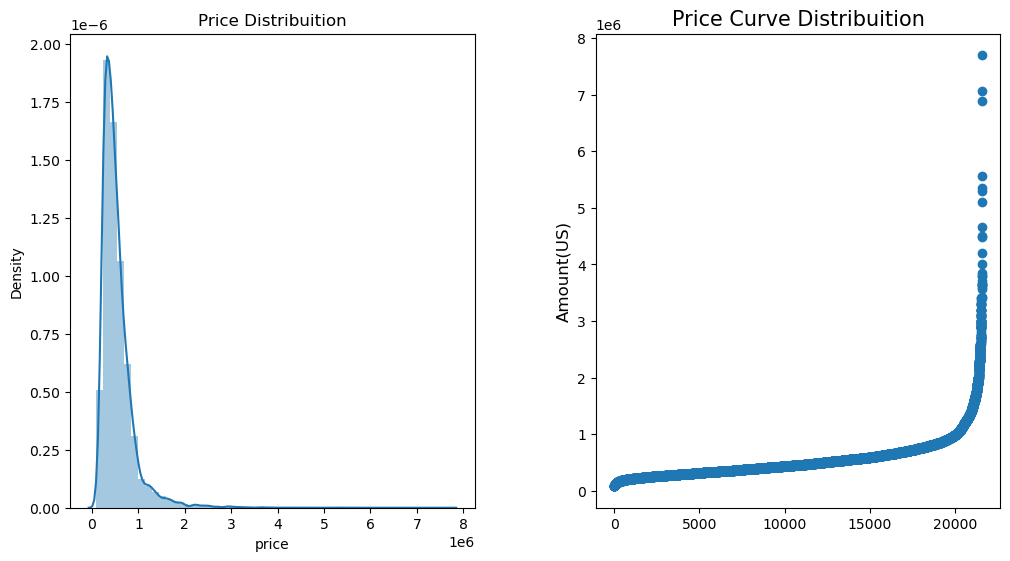

In [7]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Price Distribuition')
sns.distplot(df_usa['price'])

plt.subplot(122)
g1 = plt.scatter(range(df_usa.shape[0]), np.sort(df_usa.price.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

In [8]:
print("Price Min")
print(df_usa['price'].min())
print("Price Mean")
print(df_usa['price'].mean())
print("Price Median")
print(df_usa['price'].median())
print("Price Max")
print(df_usa['price'].max())
print("Price Std")
print(df_usa['price'].std())

Price Min
78000
Price Mean
540296.5735055795
Price Median
450000.0
Price Max
7700000
Price Std
367368.1401013936


/Users/mm527x/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 800x500 with 0 Axes>

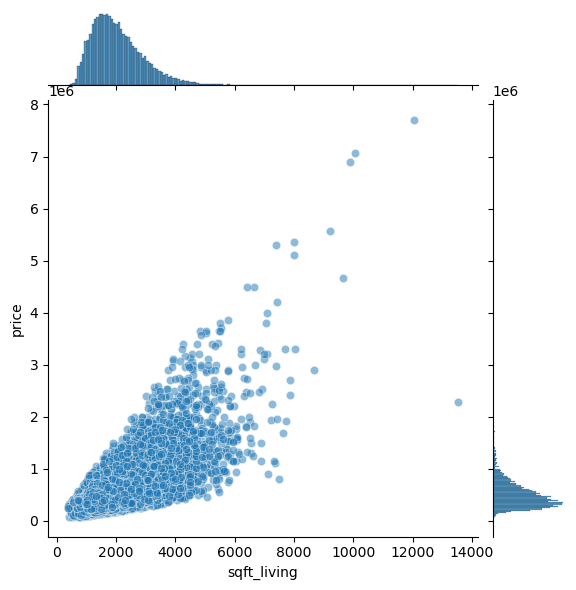

In [9]:
plt.figure(figsize = (8, 5))
sns.jointplot(df_usa.sqft_living, df_usa.price, 
              alpha = 0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

Condition counting: 
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64


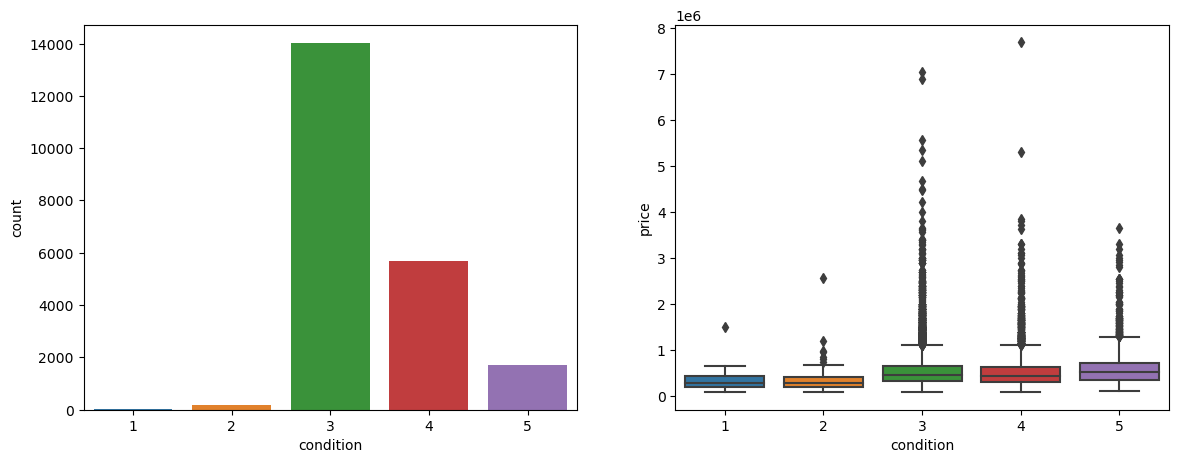

In [10]:
condition = df_usa['condition'].value_counts()

print("Condition counting: ")
print(condition)

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='condition', data=df_usa, ax=ax[0])
sns.boxplot(x='condition', y= 'price',
            data=df_usa, ax=ax[1])
plt.show()

/Users/mm527x/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x800 with 0 Axes>

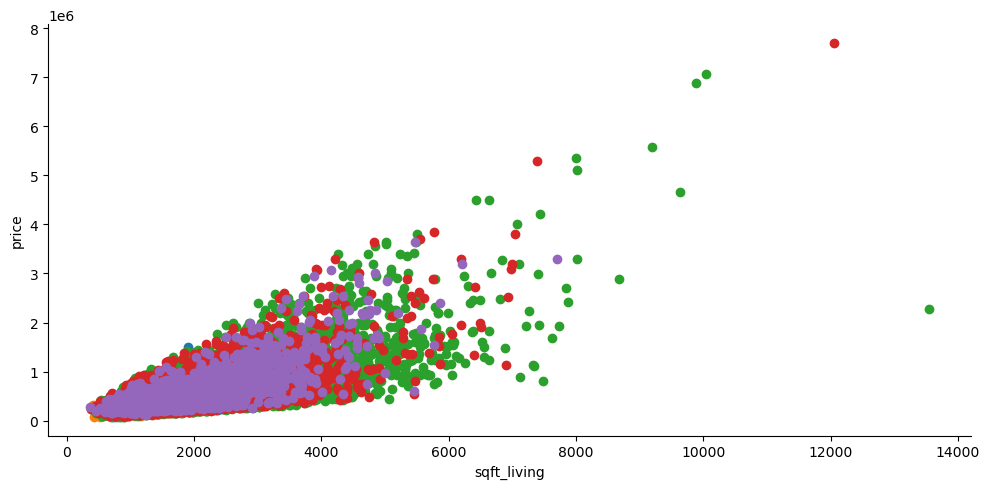

In [11]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=df_usa, hue='condition',size= 5, aspect=2)
g.map(plt.scatter, "sqft_living", "price")
plt.show()


Freuency bathroom description:
2    13847
1     3931
3     2527
4     1201
5       57
6       24
0        4
8        4
7        2
Name: bathrooms, dtype: int64


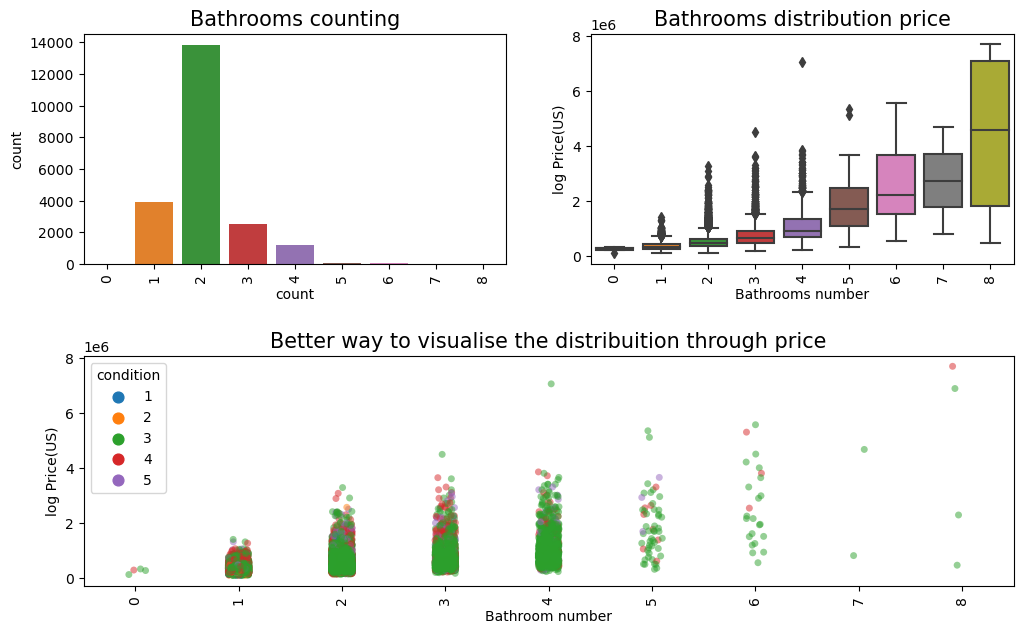

In [13]:
df_usa["bathrooms"] = df_usa['bathrooms'].round(0).astype(int)

print("Freuency bathroom description:")
print(df_usa["bathrooms"].value_counts())

plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x="bathrooms", data=df_usa,
                    ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Bathrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_xlabel("count")

ax2 = plt.subplot(222)
ax2 = sns.boxplot(x="bathrooms", y='price',
                  data=df_usa, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Bathrooms distribution price", fontsize=15)
ax2.set_xlabel("Bathrooms number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.stripplot(x="bathrooms", y="price",
                    data=df_usa, alpha=0.5,
                    jitter=True, hue="condition")
ax0.set_title("Better way to visualise the distribuition through price", fontsize=15)
ax0.set_xlabel("Bathroom number")
ax0.set_ylabel("log Price(US)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)

plt.show()